In [1]:
import sys 

print("Python Version:", sys.version, '\n')


Python Version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)] 



In [12]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [13]:
data =pd.read_csv('C:/Users/alsam/Downloads/predictive_maintenance.csv')

In [32]:
data.head() #check the data 

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
data. info() # check for any missing data and data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [15]:
data.describe() 

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [17]:
data.set_index('UDI', inplace=True) #shift index to UDI column since it doest important data during our analysis.  
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure


In [37]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [38]:
data['Target'].value_counts() 

0    9661
1     339
Name: Target, dtype: int64

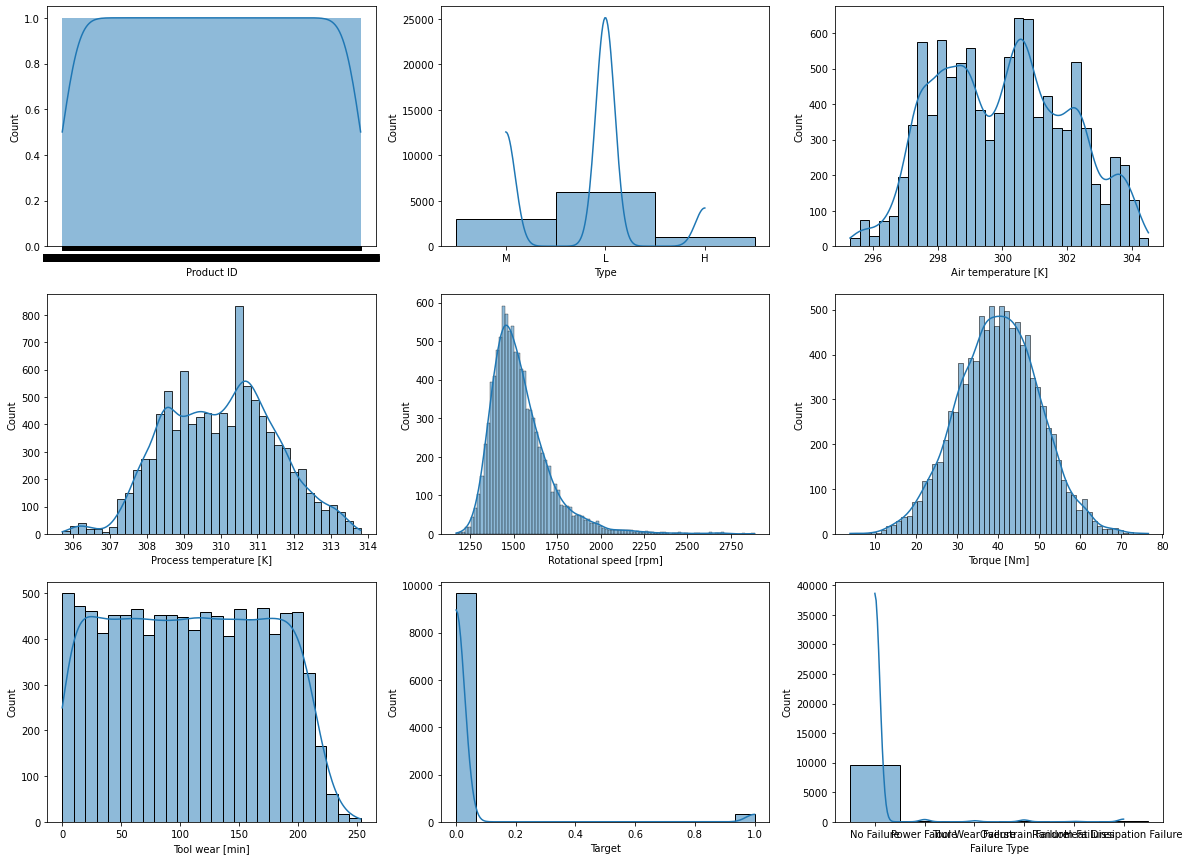

In [11]:
plt.figure(figsize=(20,15))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col],kde=True)

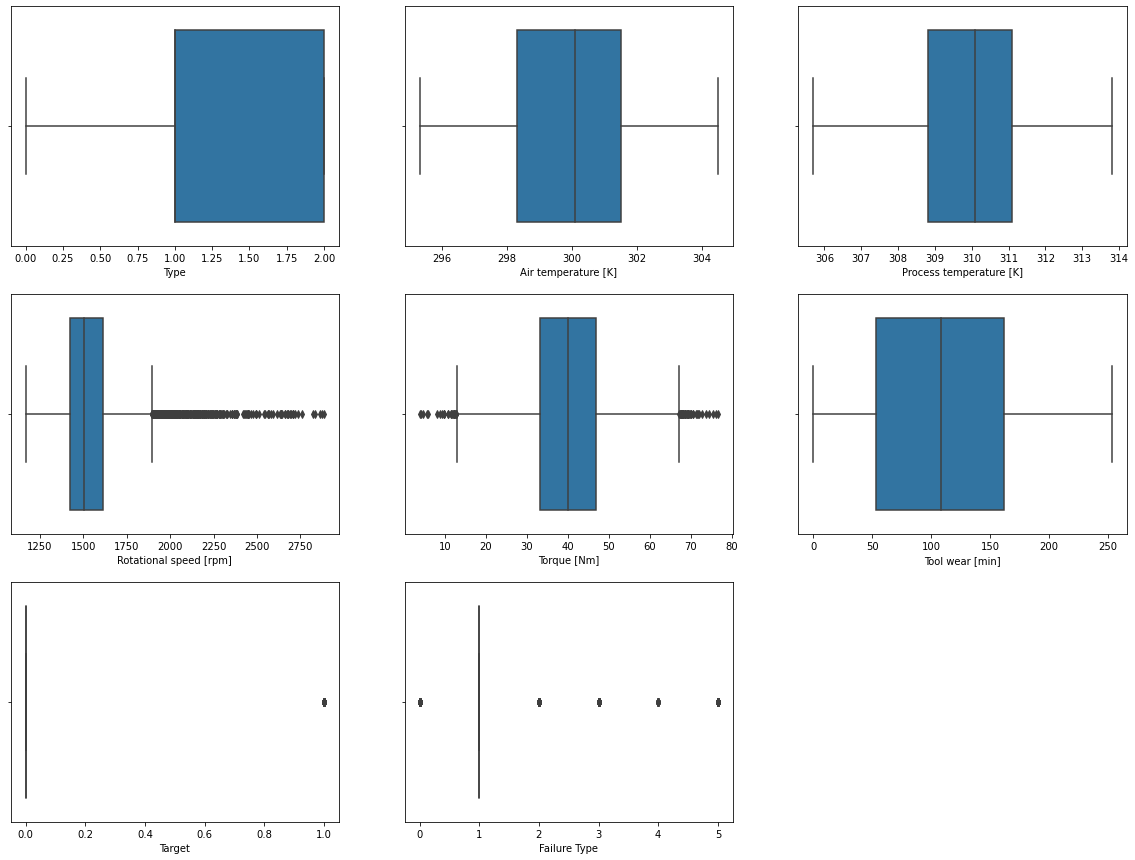

In [163]:
plt.figure(figsize=(20,15))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data[col],)

In [18]:
#Seems prudct ID wont add any value to the analsis and will be droped from data.
data.drop(data.columns[0],axis=1,inplace=True)
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9998,M,299.0,308.6,1645,33.4,22,0,No Failure


In [19]:
#encode the failure type column
from sklearn .preprocessing import LabelEncoder
encode=LabelEncoder()

In [20]:
data.loc[:,data.columns[-1]]=encode.fit_transform(data.loc[:,data.columns[-1]])
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,1
2,L,298.2,308.7,1408,46.3,3,0,1
3,L,298.1,308.5,1498,49.4,5,0,1
4,L,298.2,308.6,1433,39.5,7,0,1
5,L,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9996,M,298.8,308.4,1604,29.5,14,0,1
9997,H,298.9,308.4,1632,31.8,17,0,1
9998,M,299.0,308.6,1645,33.4,22,0,1


In [42]:
#checking on failure types column after encding its values 
data['Failure Type'].value_counts()


1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [43]:
#types visulization and counts
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

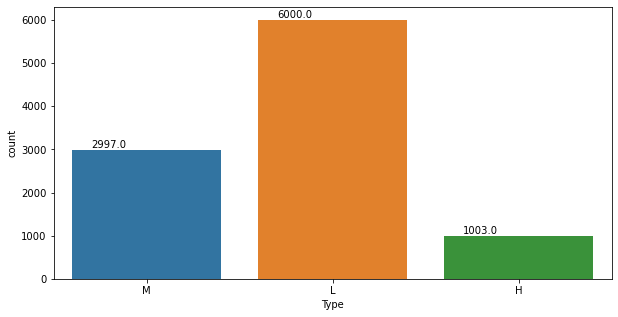

In [17]:

plt.figure(figsize=(10,5))
ax=sns.countplot(data=data,x='Type')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [21]:
data.loc[:,data.columns[0]]=encode.fit_transform(data.loc[:,data.columns[0]])
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1,2,298.1,308.6,1551,42.8,0,0,1
2,1,298.2,308.7,1408,46.3,3,0,1
3,1,298.1,308.5,1498,49.4,5,0,1
4,1,298.2,308.6,1433,39.5,7,0,1
5,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9996,2,298.8,308.4,1604,29.5,14,0,1
9997,0,298.9,308.4,1632,31.8,17,0,1
9998,2,299.0,308.6,1645,33.4,22,0,1


In [45]:
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [46]:
#from sklearn.preprocessing import LabelEncoder
#data=pd.get_dummies(data,columns=["Type"],drop_first=True)
#data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
UDI,,,,,,,,,
1,298.1,308.6,1551,42.8,0,0,1,0,1
2,298.2,308.7,1408,46.3,3,0,1,1,0
3,298.1,308.5,1498,49.4,5,0,1,1,0
4,298.2,308.6,1433,39.5,7,0,1,1,0
5,298.2,308.7,1408,40.0,9,0,1,1,0
...,...,...,...,...,...,...,...,...,...
9996,298.8,308.4,1604,29.5,14,0,1,0,1
9997,298.9,308.4,1632,31.8,17,0,1,0,0
9998,299.0,308.6,1645,33.4,22,0,1,0,1


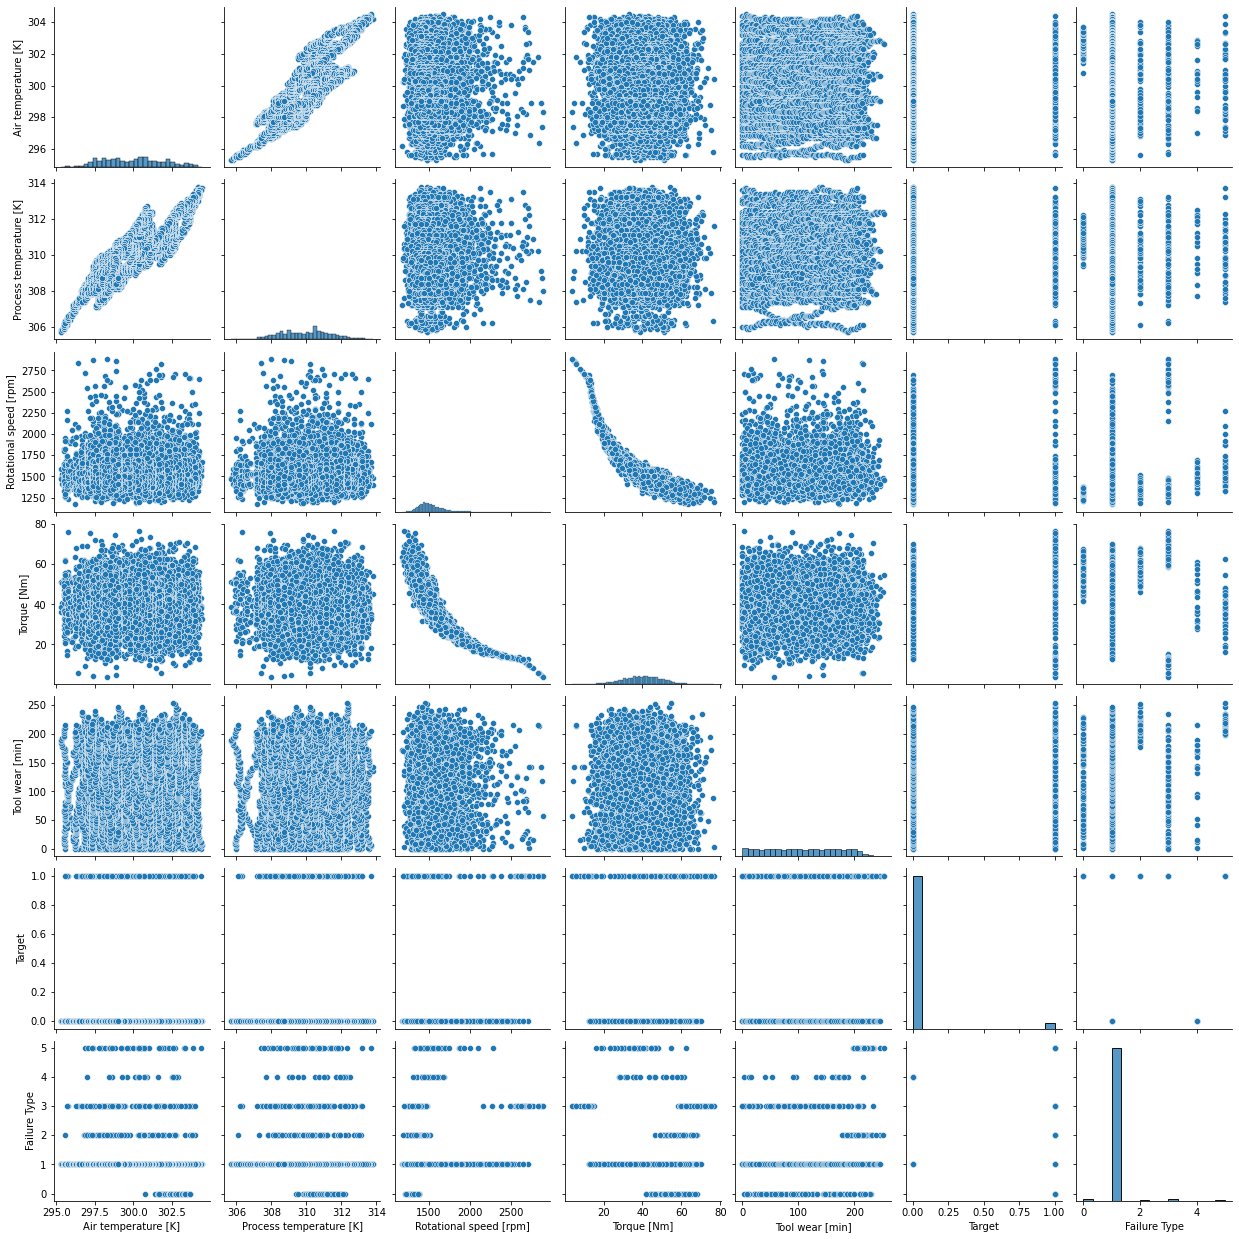

In [61]:
sns.pairplot(data)

<AxesSubplot:>

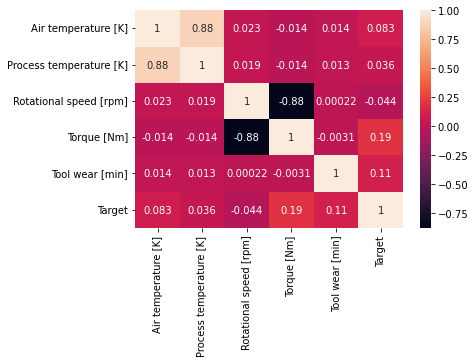

In [42]:
sns.heatmap(data.corr(),annot=True)

In [22]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

implanced dataset and will use one of oversampling methods to predict the failure(Traget column)



In [23]:
data['Failure Type'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [24]:
#define features columns and target colmuns.

x=data.drop(['Target','Failure Type',],axis=1)
y=data['Target'] #build a model to predict the failure. 
#failure types shall be removed from features colmuns to avoid any leakage in the model and build new model to predict them. 

print(x.shape,y.shape)

(10000, 6) (10000,)


In [25]:
data=data.sample(frac=1).reset_index(drop=True)
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,297.9,308.1,1393,50.3,193,0,1
1,1,301.3,310.8,1390,57.4,164,0,1
2,1,300.4,311.6,1200,76.6,3,1,3
3,2,298.1,307.9,1463,47.3,206,0,1
4,1,299.2,308.8,1542,39.2,179,0,1
...,...,...,...,...,...,...,...,...
9995,1,297.3,308.6,1273,59.8,182,0,1
9996,1,303.8,312.9,1367,49.9,192,0,1
9997,1,300.0,309.5,1717,28.3,48,0,1
9998,2,303.7,312.7,1532,42.7,194,0,1


In [48]:
x2=data.drop(['Target','Failure Type'],axis=1)
y2=data['Failure Type'] #build a model to preicdt the failure types 
#failure shall be removed from features colmuns to avoid any leakage in the model and try new model to predicring them. 

print(x2.shape,y2.shape)

(10000, 6) (10000,)


In [40]:
#sampling and train,test split 
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
smote = imblearn.over_sampling.SMOTE( random_state =123)
x_res,y_res=smote.fit_resample(x,y)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.25,random_state=123)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(14491, 6)
(14491,)
(4831, 6)
(4831,)


In [27]:
 y_train.value_counts() #check the data after over-sampling

1    7252
0    7239
Name: Target, dtype: int64

In [46]:
#logistic regression model fitting
lm1 = LogisticRegression(random_state=123) 
lm1.fit(x_train, y_train)
from sklearn import metrics

# Create a prediction set:
predictions_lm1 = lm1.predict(x_test)
# confusion matrix
df_lm1= pd.DataFrame(metrics.confusion_matrix(y_test,predictions_lm1), index=['0','1'], columns=['0','1'])
df_lm1

,0,1
0,2045,383
1,423,1980


In [42]:
print(metrics.classification_report(y_test,predictions_lm1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2428
           1       0.84      0.82      0.83      2403

    accuracy                           0.83      4831
   macro avg       0.83      0.83      0.83      4831
weighted avg       0.83      0.83      0.83      4831



In [43]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions_lm1))

0.833113519550315


0.91679075647478


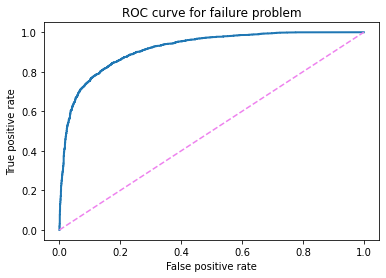

In [44]:
#present the model result by ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lm1.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for failure problem');
print(roc_auc_score(y_test, lm1.predict_proba(x_test)[:,1]))

In [73]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state = 123)
from sklearn.model_selection import cross_val_score
lm = LogisticRegression(random_state=123)

print(cross_val_score(lm, x_res, y_res,cv=10)) # scoring metric   

[0.87739265 0.85256079 0.79606625 0.76863354 0.66666667 0.82039337
 0.81987578 0.87318841 0.88612836 0.87939959]


In [51]:
lm2 = LogisticRegression(random_state=123) 
lm2.fit(x2_train, y2_train)
from sklearn import metrics

# Create a prediction set:
predictions_lm2 = lm2.predict((x2_test))
# confusion matrix
df_lm2= pd.DataFrame(metrics.confusion_matrix(y2_test,predictions_lm2), index=['0','1','2','3','4','5'], columns=['0','1','2','3','4','5'])
df_lm2


,0,1,2,3,4,5
0,2079,0,248,23,18,0
1,359,1251,29,44,618,161
2,27,0,2109,66,5,199
3,0,12,111,2344,0,5
4,218,686,0,22,1365,82
5,36,0,342,0,2,2017


In [52]:
print(metrics.classification_report(y2_test,predictions_lm2))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      2368
           1       0.64      0.51      0.57      2462
           2       0.74      0.88      0.80      2406
           3       0.94      0.95      0.94      2472
           4       0.68      0.58      0.62      2373
           5       0.82      0.84      0.83      2397

    accuracy                           0.77     14478
   macro avg       0.76      0.77      0.76     14478
weighted avg       0.76      0.77      0.76     14478



In [79]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state = 123)
from sklearn.model_selection import cross_val_score
lm3 = LogisticRegression(random_state=123)

print(cross_val_score(lm3, x2_res, y2_res,cv=10)) # scoring metric 

[0.76657459 0.74188536 0.76843378 0.75928164 0.77568641 0.77361423
 0.74823001 0.767225   0.75720946 0.7568641 ]


In [86]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=123)
rf.fit(x_train,y_train)
from sklearn import metrics

# Create a prediction set:
predictions_rf = rf.predict((x_test)) # transformed on the fly
# confusion matrix
df= pd.DataFrame(metrics.confusion_matrix(y_test,predictions_rf), index=['0','1'], columns=['0','1'])
df

,0,1
0,2336,92
1,34,2369


In [75]:
print(metrics.classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2428
           1       0.96      0.99      0.97      2403

    accuracy                           0.97      4831
   macro avg       0.97      0.97      0.97      4831
weighted avg       0.97      0.97      0.97      4831



In [76]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions_rf))

0.973979875512556


0.99812005654656


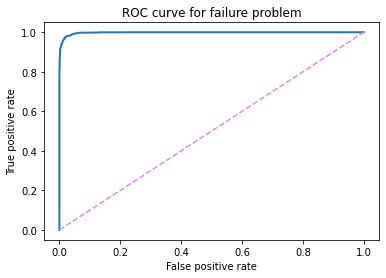

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for failure problem');
print(roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))

In [78]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state = 123)
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=123)

print(cross_val_score(rf, x_res, y_res,cv=10)) # scoring metric   

[0.97361614 0.97723745 0.96532091 0.95082816 0.95859213 0.96014493
 0.96532091 0.96635611 0.98084886 0.97981366]


In [72]:
 y2.value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [82]:
from imblearn.over_sampling import SMOTE
smote = imblearn.over_sampling.SMOTE( random_state = 123)
x2_res,y2_res=smote.fit_resample(x2,y2)

from sklearn.model_selection import train_test_split

x2_train,x2_test,y2_train,y2_test=train_test_split(x2_res,y2_res,test_size=0.25,random_state=123)

print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)


(43434, 6)
(43434,)
(14478, 6)
(14478,)


In [83]:
rf3=RandomForestClassifier()
rf3.fit(x2_train,y2_train)

predictions_rf3 = rf3.predict((x2_test)) # transformed on the fly
# confusion matrix
df3= pd.DataFrame(metrics.confusion_matrix(y2_test,predictions_rf3), index=['0','1','2','3','4','5'], columns=['0','1','2','3','4','5'])
df3

,0,1,2,3,4,5
0,2394,0,0,0,0,0
1,2,2263,9,17,31,37
2,0,0,2434,0,0,2
3,0,0,0,2403,0,0
4,0,2,0,0,2441,0
5,0,0,3,0,0,2440


In [84]:
print(metrics.classification_report(y2_test,predictions_rf3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2394
           1       1.00      0.96      0.98      2359
           2       1.00      1.00      1.00      2436
           3       0.99      1.00      1.00      2403
           4       0.99      1.00      0.99      2443
           5       0.98      1.00      0.99      2443

    accuracy                           0.99     14478
   macro avg       0.99      0.99      0.99     14478
weighted avg       0.99      0.99      0.99     14478



In [89]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state = 123)
from sklearn.model_selection import cross_val_score
rf2 = RandomForestClassifier(random_state=123)

print(cross_val_score(rf2, x2_res, y2_res,cv=10)) # scoring metric   

[0.99223066 0.99326657 0.99464687 0.99343809 0.99343809 0.99568296
 0.99481955 0.99412882 0.99292005 0.99188396]
